#1 - Modelo descritivo: Análise exploratória e agrupamento de dados

In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import chardet
with open('dataset.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [ ]:
dados = pd.read_csv('dataset.csv',encoding='ISO-8859-1')
dados.head()

,Rank in 2022,Country,2000,2007,2014,2022,Absolute change,Percent change
0,1,Belarus,5.0,5.0,5.0,5.0,0.0,0.0
1,1,Bosnia and Herzegovina,9.3,6.6,5.0,5.0,0.0,0.0
2,1,Chile,5.0,5.0,5.0,5.0,0.0,0.0
3,1,China,13.3,7.8,5.0,5.0,0.0,0.0
4,1,Croatia,5.0,5.0,5.0,5.0,0.0,0.0


In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
dados.keys()

Index(['Rank in 2022', 'Country', '2000', '2007', '2014', '2022',
       'Absolute change', 'Percent change'],
      dtype='object')

In [ ]:
dados = pd.DataFrame(dados)
datatypes_per_column = {
       "Rank in 2022": "int",
       "Country": "string",
       "2000": "float",
       "2007": "float",
       "2014": "float",
       "2022": "float",
       "Absolute change": "float",
       "Percent change": "float",

       }

dados = dados.astype(datatypes_per_column)


In [ ]:
(dados.replace('<5','5'))
#Os valores de '<5' foram assumidos como '5' para melhor aplicabilidade dos parâmetros.

,Rank in 2022,Country,2000,2007,2014,2022,Absolute change,Percent change
0,1,Belarus,5.0,5.0,5.0,5.000,0.0,0.0
1,1,Bosnia and Herzegovina,9.3,6.6,5.0,5.000,0.0,0.0
2,1,Chile,5.0,5.0,5.0,5.000,0.0,0.0
3,1,China,13.3,7.8,5.0,5.000,0.0,0.0
4,1,Croatia,5.0,5.0,5.0,5.000,0.0,0.0
...,...,...,...,...,...,...,...,...
124,121,Yemen,41.3,38.4,41.7,45.100,3.4,8.2
125,121,Burundi,99.0,99.0,99.0,49.935,0.0,0.0
126,121,Somalia,99.0,99.0,99.0,49.935,0.0,0.0
127,121,South Sudan,99.0,99.0,99.0,49.935,0.0,0.0


In [ ]:
dados['Percent change']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
124    8.2
125    0.0
126    0.0
127    0.0
128    0.0
Name: Percent change, Length: 129, dtype: float64

In [ ]:
dados['Absolute change']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
124    3.4
125    0.0
126    0.0
127    0.0
128    0.0
Name: Absolute change, Length: 129, dtype: float64

In [ ]:
dados['2014']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
124    41.7
125    99.0
126    99.0
127    99.0
128    99.0
Name: 2014, Length: 129, dtype: float64

In [ ]:
dados['2022']

0       5.000
1       5.000
2       5.000
3       5.000
4       5.000
        ...  
124    45.100
125    49.935
126    49.935
127    49.935
128    49.935
Name: 2022, Length: 129, dtype: float64

In [ ]:
dados.loc[dados['Rank in 2022'].idxmax()]

Rank in 2022         121
Country            Yemen
2000                41.3
2007                38.4
2014                41.7
2022                45.1
Absolute change      3.4
Percent change       8.2
Name: 124, dtype: object

#1 - Estatisticas

In [ ]:
max14 = dados.loc[dados['2014'].idxmax()]
print(max14)

Rank in 2022          116
Country            Guinea
2000                 99.0
2007                 99.0
2014                 99.0
2022                 34.9
Absolute change       0.0
Percent change        0.0
Name: 116, dtype: object


In [ ]:
min14 = dados.loc[dados['2014'].idxmin()]
print(min14)

Rank in 2022             1
Country            Belarus
2000                   5.0
2007                   5.0
2014                   5.0
2022                   5.0
Absolute change        0.0
Percent change         0.0
Name: 0, dtype: object


In [ ]:
max22 = dados.loc[dados['2022'].idxmax()]
print(max22)

Rank in 2022           121
Country            Burundi
2000                  99.0
2007                  99.0
2014                  99.0
2022                49.935
Absolute change        0.0
Percent change         0.0
Name: 125, dtype: object


In [ ]:
min22 = dados.loc[dados['2022'].idxmin()]
print(min22)

Rank in 2022             1
Country            Belarus
2000                   5.0
2007                   5.0
2014                   5.0
2022                   5.0
Absolute change        0.0
Percent change         0.0
Name: 0, dtype: object


In [ ]:
maxabs_change = dados.loc[dados['Absolute change'].idxmax()]
print(maxabs_change)

Rank in 2022              85
Country            Venezuela
2000                    14.6
2007                    10.1
2014                     8.1
2022                    19.9
Absolute change         11.8
Percent change         145.7
Name: 84, dtype: object


In [ ]:
minabs_change = dados.loc[dados['Absolute change'].idxmin()]
print(minabs_change)

Rank in 2022               67
Country            Tajikistan
2000                     40.3
2007                     32.9
2014                     20.6
2022                     13.9
Absolute change          -6.7
Percent change          -32.5
Name: 67, dtype: object


In [ ]:
maxper_change = dados.loc[dados['Percent change'].idxmax()]
print(maxper_change)

Rank in 2022              85
Country            Venezuela
2000                    14.6
2007                    10.1
2014                     8.1
2022                    19.9
Absolute change         11.8
Percent change         145.7
Name: 84, dtype: object


In [ ]:
minper_change = dados.loc[dados['Percent change'].idxmin()]
print(minper_change)

Rank in 2022             22
Country            Mongolia
2000                   30.0
2007                   21.8
2014                    9.2
2022                    5.7
Absolute change        -3.5
Percent change        -38.0
Name: 22, dtype: object


In [ ]:
media_abschange = statistics.mean(dados['Absolute change'])
print('Média mudança Absoluta:', "{:.2f}".format(media_abschange))

Média mudança Absoluta: -0.95


In [ ]:
media_14 = statistics.mean(dados['2014'])
media_22 = statistics.mean(dados['2022'])
std_14 = statistics.stdev(dados['2014'])
std_22 = statistics.stdev(dados['2022'])
moda_14 = statistics.mode(dados['2014'])
moda_22 = statistics.mode(dados['2022'])

print('Média 2014:', "{:.2f}".format(media_14))
print('Média 2022:', "{:.2f}".format(media_22))
print('Desvio Padrão Amostral de 2014:', "{:.2f}".format(std_14))
print('Desvio Padrão Amostral de 2022: ', "{:.2f}".format(std_22))
print("Moda 2014:","{:.2f}".format(moda_14))
print("Moda 2014:","{:.2f}".format(moda_22))


Média 2014: 21.64
Média 2022: 17.17
Desvio Padrão Amostral de 2014: 22.37
Desvio Padrão Amostral de 2022:  11.81
Moda 2014: 5.00
Moda 2014: 5.00


#1 - Gráficos

In [ ]:
def func_linear(x): return(4*x-5)

x = np.array([i for i in range(-50,50)])

## Adidionando um ruído branco nos dados
mean_noise = 0
sigma_x = 25
y = func_linear(x) + np.random.normal(mean_noise,sigma_x, len(x))


# Definindo uma função linear arbitraria (perceba que a=4 e b=5)
def func_quadratica(x): return(0.5*x**2-5*x+50)

## Adidionando um ruído branco nos dados
mean_noise = 0
sigma_x = 225
z = func_quadratica(x) + np.random.normal(mean_noise,sigma_x, len(x))


linhas = [str(int(x[i]))+';'+str(int(y[i]))+';'+str(int(z[i]))+'\n' for i in range(0, len(x))]


with open('dados', 'w') as file:
    file.writelines(linhas)

[Text(0.5, 0, '2022'), Text(0, 0.5, 'Variação')]

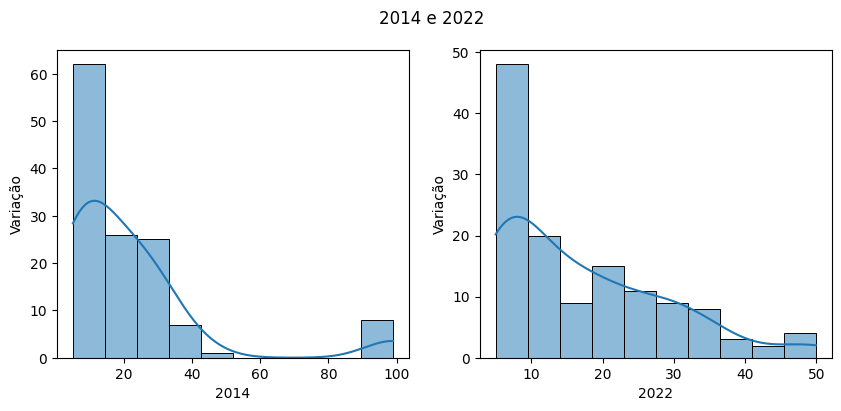

In [ ]:
fig, axes =  plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('2014 e 2022')


sns.histplot(ax=axes[0],
            data=dados['2014'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )

sns.histplot(ax=axes[1],
            data=dados['2022'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )


axes[0].set(xlabel='2014', ylabel='Variação')
axes[1].set(xlabel='2022', ylabel='Variação')

[Text(0.5, 0, 'Percent change'), Text(0, 0.5, 'Variação')]

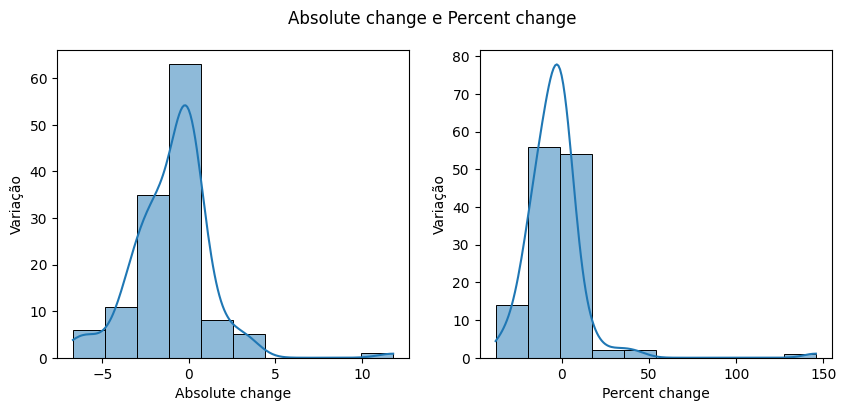

In [ ]:
fig, axes =  plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Absolute change e Percent change')


sns.histplot(ax=axes[0],
            data=dados['Absolute change'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )

sns.histplot(ax=axes[1],
            data=dados['Percent change'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )


axes[0].set(xlabel='Absolute change', ylabel='Variação')
axes[1].set(xlabel='Percent change', ylabel='Variação')

<Axes: xlabel='Absolute change', ylabel='Rank in 2022'>

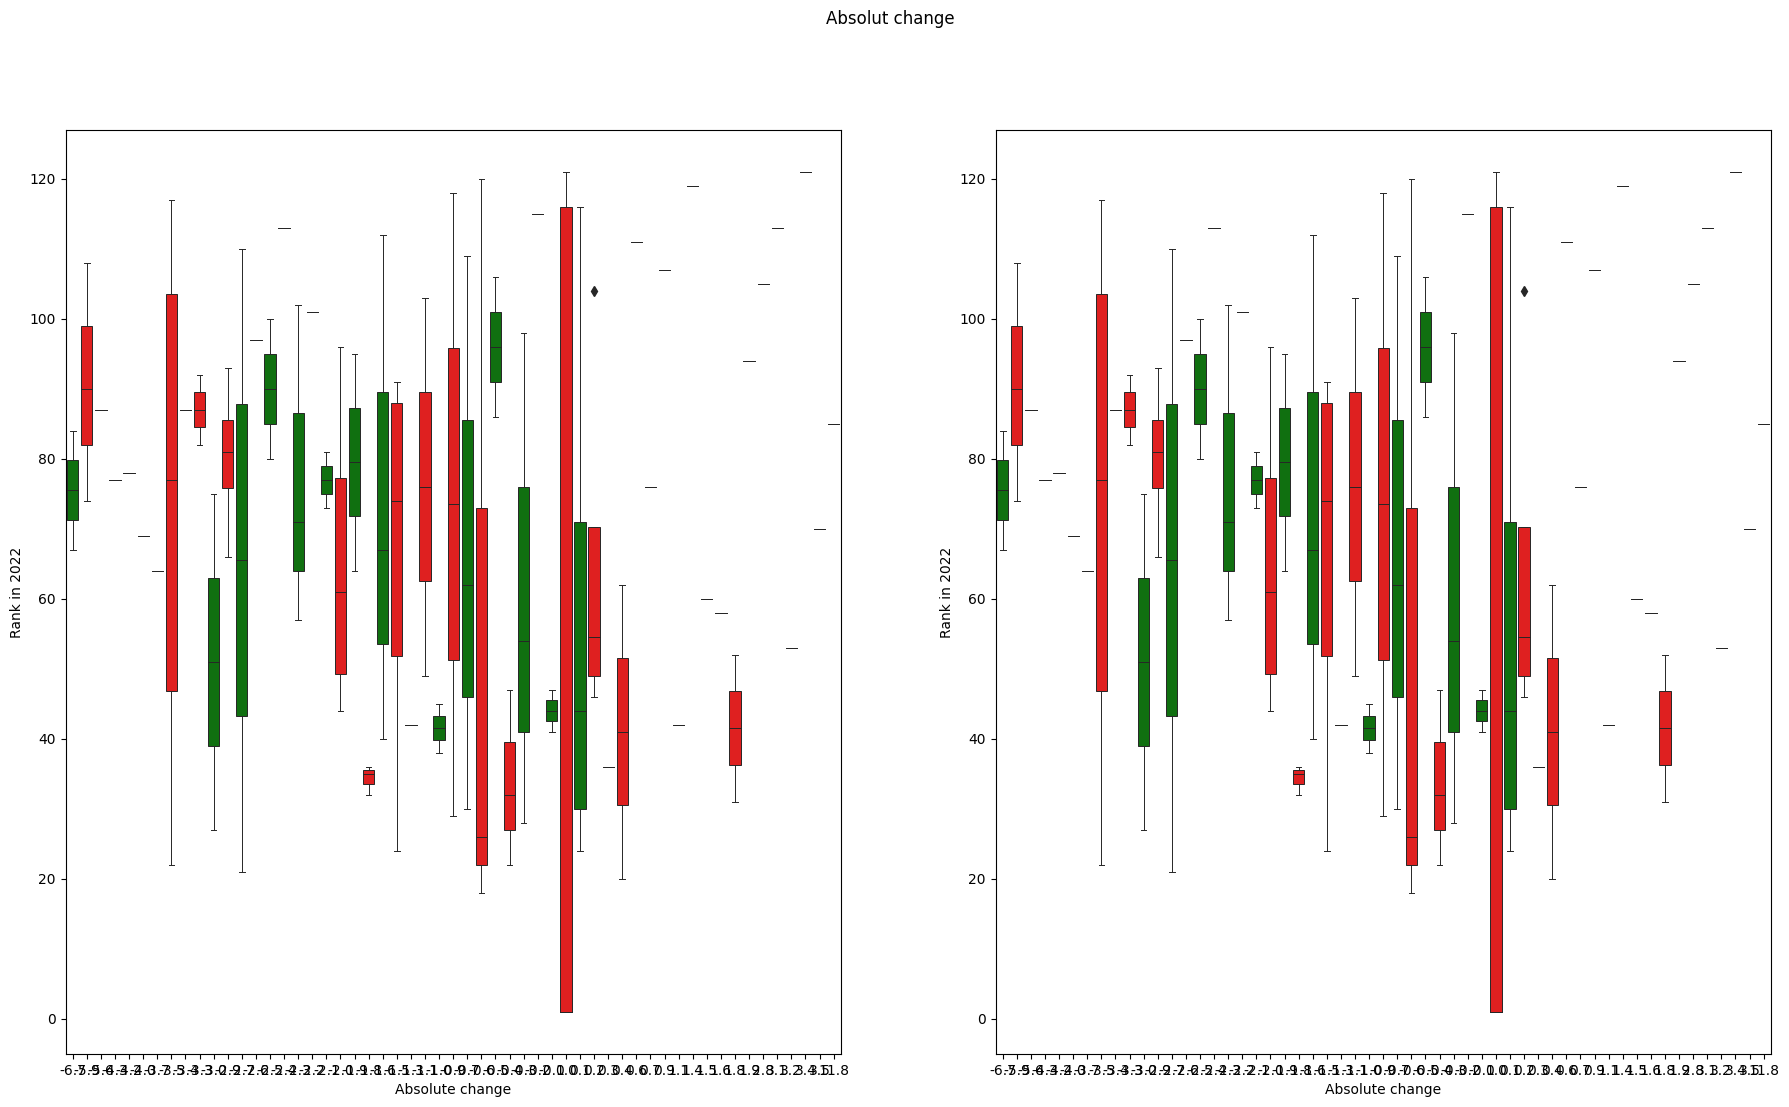

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 12))
fig.suptitle('Absolut change')

sns.boxplot(x="Absolute change", y="Rank in 2022",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados
           )

sns.boxplot(x="Absolute change", y="Rank in 2022",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados

           )

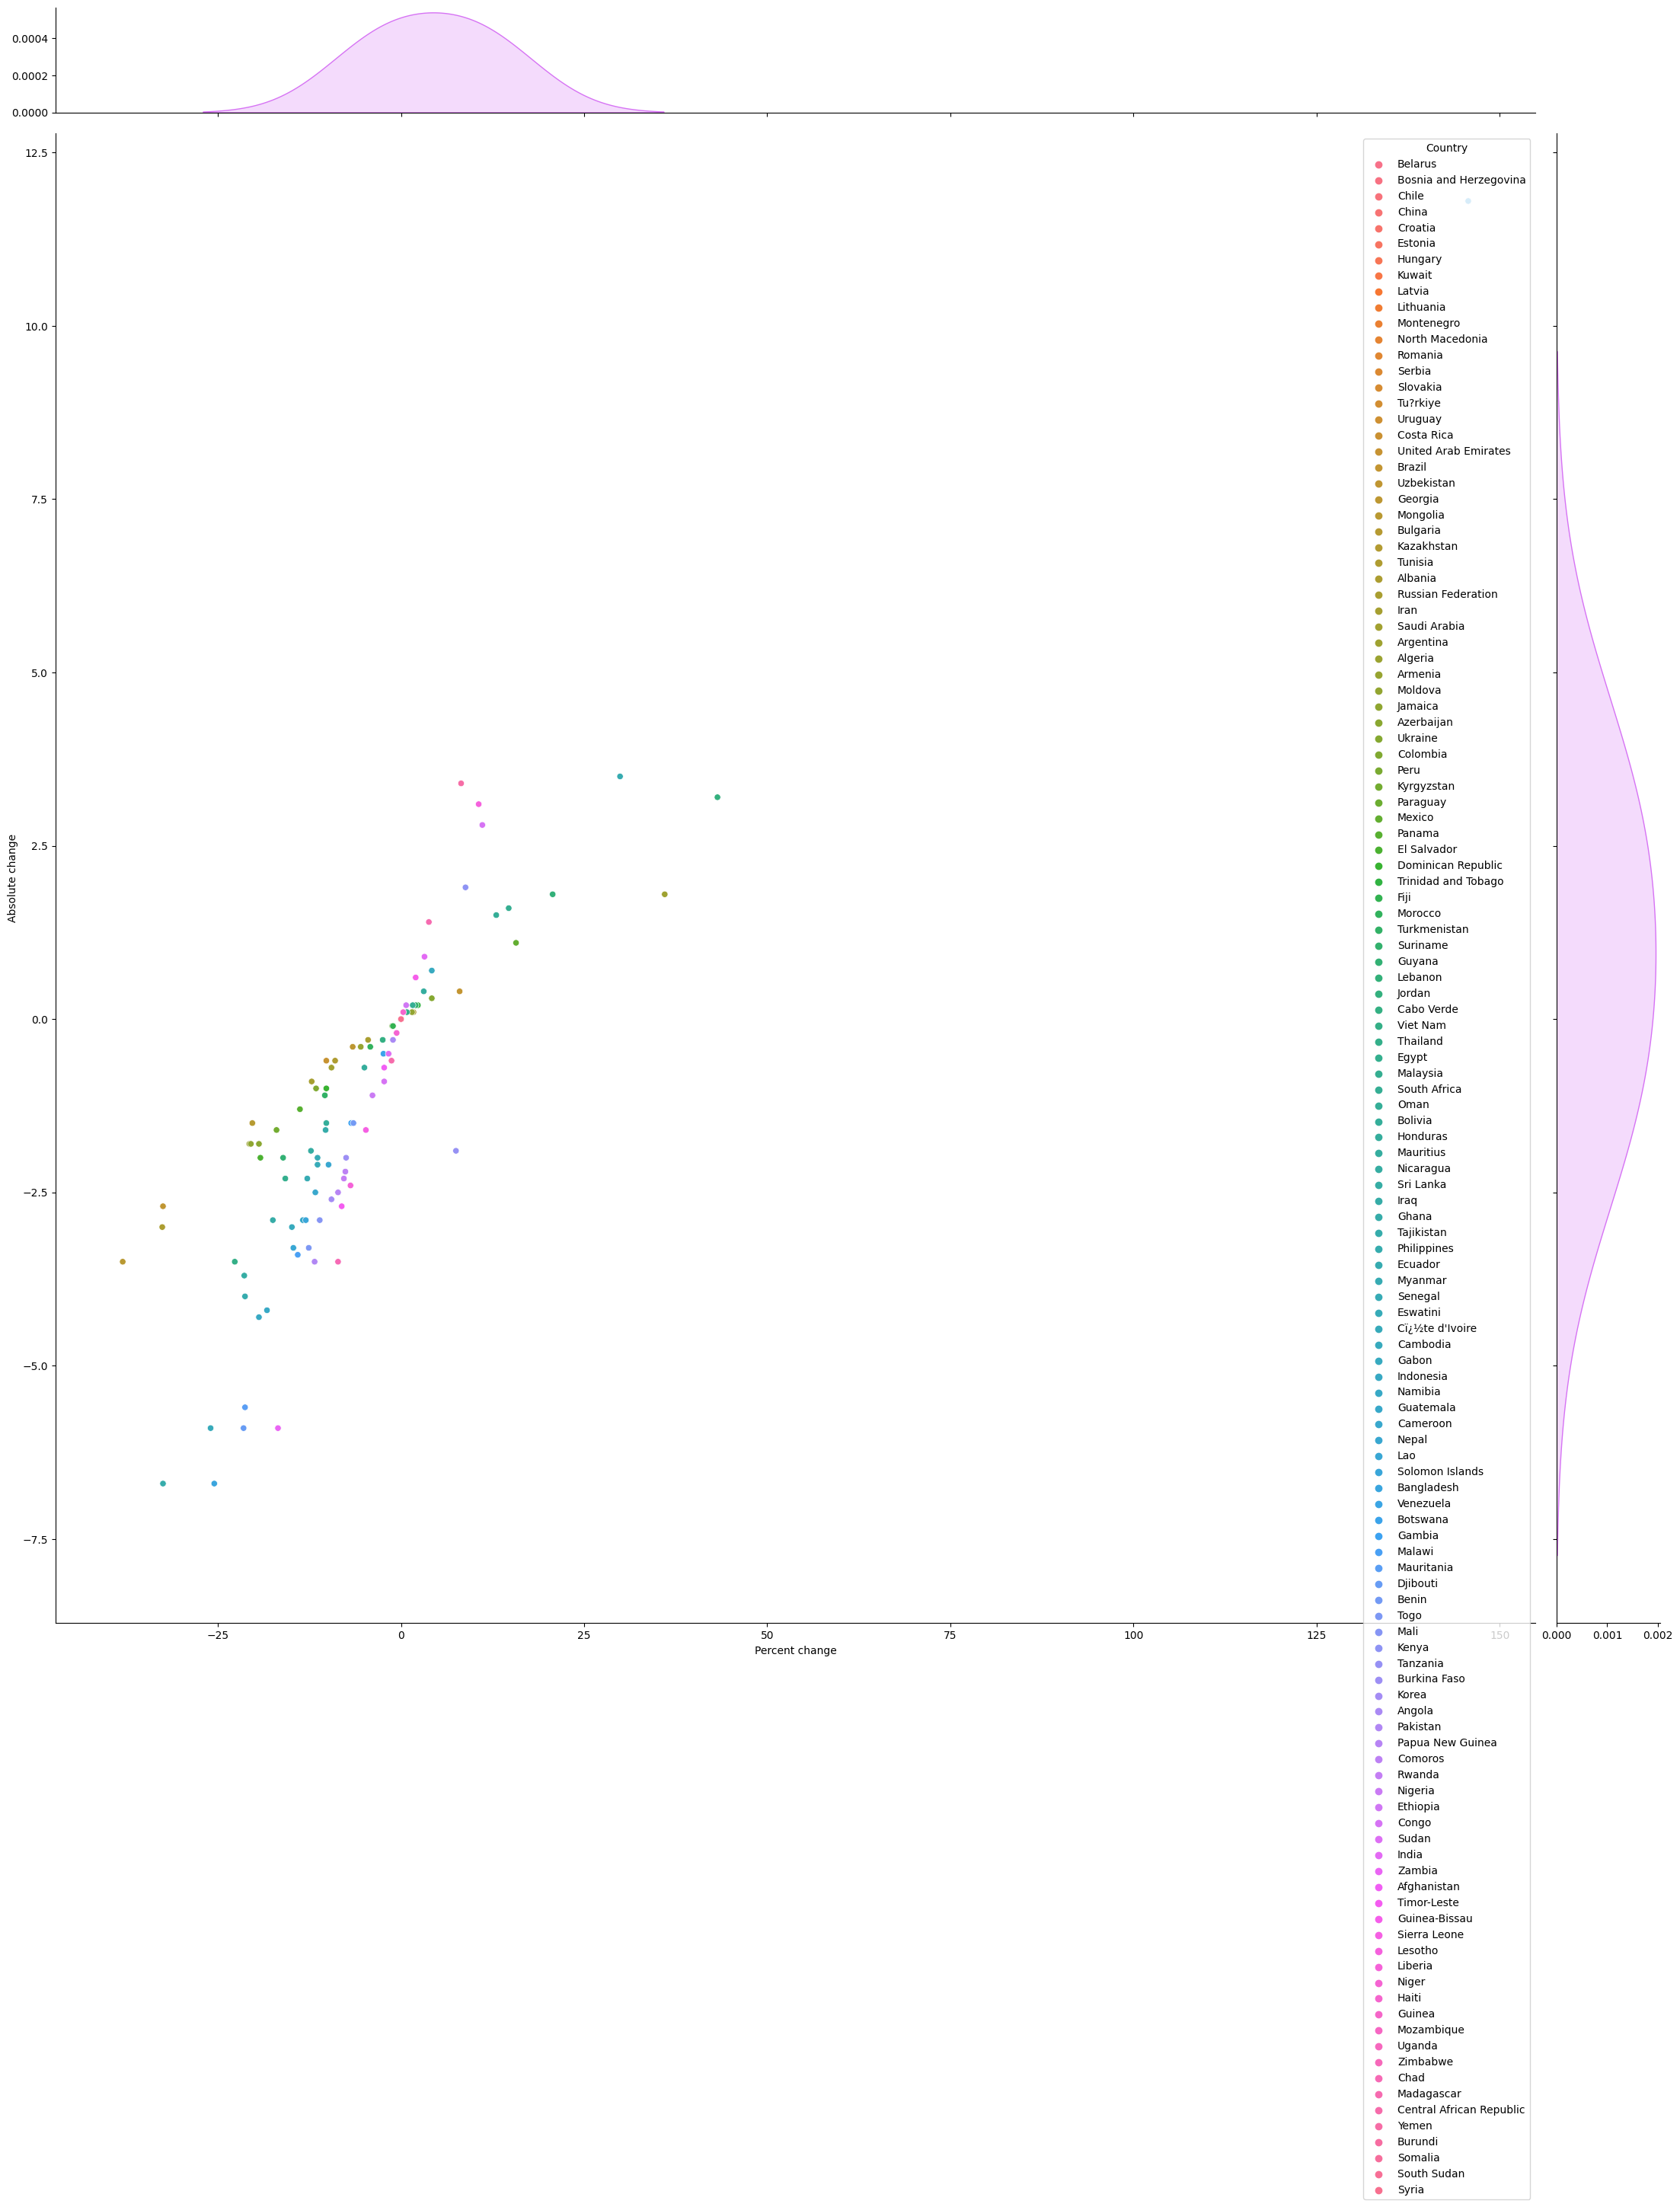

In [ ]:
sns.jointplot(data=dados,
              x="Percent change", y="Absolute change",
              height=22,
              ratio=12,
              marginal_ticks=True,
              hue = 'Country'

             )


##1 - Agrupamento de dados

In [ ]:
dados_agrupados = dados.groupby('Country').mean()

print(dados_agrupados)

             Rank in 2022  2000  2007  2014  2022  Absolute change  \
Country                                                              
Afghanistan         109.0  50.3  38.7  30.6  29.9             -0.7   
Albania              27.0  20.7  15.8   9.2   6.2             -3.0   
Algeria              32.0  14.5  11.4   8.7   6.9             -1.8   
Angola               98.0  64.9  44.7  26.2  25.9             -0.3   
Argentina            31.0   6.6   5.5   5.0   6.8              1.8   
...                   ...   ...   ...   ...   ...              ...   
Venezuela            85.0  14.6  10.1   8.1  19.9             11.8   
Viet Nam             55.0  26.3  21.4  15.4  11.9             -3.5   
Yemen               121.0  41.3  38.4  41.7  45.1              3.4   
Zambia              108.0  53.3  46.0  35.2  29.3             -5.9   
Zimbabwe            116.0  99.0  99.0  99.0  34.9              0.0   

             Percent change  
Country                      
Afghanistan            -2.3  

In [ ]:
dados_agrupados2 = dados.groupby(['Country', 'Absolute change']).sum()

print(dados_agrupados2)

                             Rank in 2022  2000  2007  2014  2022  \
Country     Absolute change                                         
Afghanistan -0.7                      109  50.3  38.7  30.6  29.9   
Albania     -3.0                       27  20.7  15.8   9.2   6.2   
Algeria     -1.8                       32  14.5  11.4   8.7   6.9   
Angola      -0.3                       98  64.9  44.7  26.2  25.9   
Argentina    1.8                       31   6.6   5.5   5.0   6.8   
...                                   ...   ...   ...   ...   ...   
Venezuela    11.8                      85  14.6  10.1   8.1  19.9   
Viet Nam    -3.5                       55  26.3  21.4  15.4  11.9   
Yemen        3.4                      121  41.3  38.4  41.7  45.1   
Zambia      -5.9                      108  53.3  46.0  35.2  29.3   
Zimbabwe     0.0                      116  99.0  99.0  99.0  34.9   

                             Percent change  
Country     Absolute change                  
Afghanista

In [ ]:
dados_agrupados3 = dados.groupby(['Country', 'Percent change']).sum()

print(dados_agrupados3)

                            Rank in 2022  2000  2007  2014  2022  \
Country     Percent change                                         
Afghanistan -2.3                     109  50.3  38.7  30.6  29.9   
Albania     -32.6                     27  20.7  15.8   9.2   6.2   
Algeria     -20.7                     32  14.5  11.4   8.7   6.9   
Angola      -1.1                      98  64.9  44.7  26.2  25.9   
Argentina    36.0                     31   6.6   5.5   5.0   6.8   
...                                  ...   ...   ...   ...   ...   
Venezuela    145.7                    85  14.6  10.1   8.1  19.9   
Viet Nam    -22.7                     55  26.3  21.4  15.4  11.9   
Yemen        8.2                     121  41.3  38.4  41.7  45.1   
Zambia      -16.8                    108  53.3  46.0  35.2  29.3   
Zimbabwe     0.0                     116  99.0  99.0  99.0  34.9   

                            Absolute change  
Country     Percent change                   
Afghanistan -2.3       

In [ ]:
dados_agrupados4 = dados.groupby(['Country', '2014']).sum()

print(dados_agrupados4)

                  Rank in 2022  2000  2007  2022  Absolute change  \
Country     2014                                                    
Afghanistan 30.6           109  50.3  38.7  29.9             -0.7   
Albania     9.2             27  20.7  15.8   6.2             -3.0   
Algeria     8.7             32  14.5  11.4   6.9             -1.8   
Angola      26.2            98  64.9  44.7  25.9             -0.3   
Argentina   5.0             31   6.6   5.5   6.8              1.8   
...                        ...   ...   ...   ...              ...   
Venezuela   8.1             85  14.6  10.1  19.9             11.8   
Viet Nam    15.4            55  26.3  21.4  11.9             -3.5   
Yemen       41.7           121  41.3  38.4  45.1              3.4   
Zambia      35.2           108  53.3  46.0  29.3             -5.9   
Zimbabwe    99.0           116  99.0  99.0  34.9              0.0   

                  Percent change  
Country     2014                  
Afghanistan 30.6            -2.3

In [ ]:
dados_agrupados5 = dados.groupby(['Country', '2022']).sum()

print(dados_agrupados5)

                  Rank in 2022  2000  2007  2014  Absolute change  \
Country     2022                                                    
Afghanistan 29.9           109  50.3  38.7  30.6             -0.7   
Albania     6.2             27  20.7  15.8   9.2             -3.0   
Algeria     6.9             32  14.5  11.4   8.7             -1.8   
Angola      25.9            98  64.9  44.7  26.2             -0.3   
Argentina   6.8             31   6.6   5.5   5.0              1.8   
...                        ...   ...   ...   ...              ...   
Venezuela   19.9            85  14.6  10.1   8.1             11.8   
Viet Nam    11.9            55  26.3  21.4  15.4             -3.5   
Yemen       45.1           121  41.3  38.4  41.7              3.4   
Zambia      29.3           108  53.3  46.0  35.2             -5.9   
Zimbabwe    34.9           116  99.0  99.0  99.0              0.0   

                  Percent change  
Country     2022                  
Afghanistan 29.9            -2.3

In [ ]:
dados_agrupados6 = dados.groupby(['Country', '2014', '2022']).sum()

print(dados_agrupados6)

                       Rank in 2022  2000  2007  Absolute change  \
Country     2014 2022                                              
Afghanistan 30.6 29.9           109  50.3  38.7             -0.7   
Albania     9.2  6.2             27  20.7  15.8             -3.0   
Algeria     8.7  6.9             32  14.5  11.4             -1.8   
Angola      26.2 25.9            98  64.9  44.7             -0.3   
Argentina   5.0  6.8             31   6.6   5.5              1.8   
...                             ...   ...   ...              ...   
Venezuela   8.1  19.9            85  14.6  10.1             11.8   
Viet Nam    15.4 11.9            55  26.3  21.4             -3.5   
Yemen       41.7 45.1           121  41.3  38.4              3.4   
Zambia      35.2 29.3           108  53.3  46.0             -5.9   
Zimbabwe    99.0 34.9           116  99.0  99.0              0.0   

                       Percent change  
Country     2014 2022                  
Afghanistan 30.6 29.9            -2

#1- Relatório

A análise exploratória dos dados sobre fome mundial revelam uma diminuição significativa entre os anos 2014 e 2022, principalmente quando vistos pelo percentual de mudança, quando agrupados os dados podemos notar que há países subdesenvolvidos que tiveram uma baixa considerável nos pontos de fome, porém também conseguimos ver que outros países, em sua maioria do continente africano, não tiveram mudanças significativas e continuam com níveis altíssimos de fome. Claro que é possível traçar um paralelo entre países explorados e colonizados e países colonizadores, sendo discrepante o desenvolvimento de ambos e a distribuição de recursos.

#2.a. Modelo Preditivo



In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('crop1.csv', sep=',', quotechar='"')

In [ ]:
df.shape

(1895975, 6)

In [ ]:
df.isnull().sum()

Area            0
Item            0
Element         0
Year            0
Unit            0
Value      129500
dtype: int64

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1766475 entries, 0 to 1895974
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Area     object 
 1   Item     object 
 2   Element  object 
 3   Year     int64  
 4   Unit     object 
 5   Value    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.3+ MB


In [ ]:
df.nunique()

Area          245
Item          118
Element         3
Year           60
Unit            3
Value      420009
dtype: int64

In [ ]:
df

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0
...,...,...,...,...,...,...
1895970,Net Food Importing Developing Countries,Wheat,Production,2016,tonnes,52845182.0
1895971,Net Food Importing Developing Countries,Wheat,Production,2017,tonnes,57099662.0
1895972,Net Food Importing Developing Countries,Wheat,Production,2018,tonnes,55571780.0
1895973,Net Food Importing Developing Countries,Wheat,Production,2019,tonnes,53903035.0


In [ ]:
#Dataframe separado por tonelada(tonnel)
df_ton = df[(df['Unit'] == 'tonnes')]

In [ ]:
#Dataframe separado por hectare(ha)
df_ha = df[(df['Unit'] == 'ha')]

In [ ]:
#Dataframe separado por hectograma (hg/ha)
df_hg = df[(df['Unit'] == 'hg/ha')]

#2.a - Calculando por Value total

Inicialmente realizamos com o Value total, sem separar as unidades de medidas e chegamos em tal resultado:



1.  2030: 409.141.718,47
2.  2050: 413.162.044,68

Mas a coluna Unit possui três unidades de medida diferentes, portanto optamos por dividir esse dataframe em três dataframes, cada um com uma unidade de medida para que não houvesse problemas na leitura. Além disso foi feito o tratamento de dados para retirar valores nulos do dataframe.


In [ ]:
df.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0


In [ ]:
x = df.drop(columns=['Area', 'Item','Element', 'Unit','Value'])
y = df['Value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()


x_train = x_train.values.reshape(-1, 1)


x_train = scaler.fit_transform(x_train)


x_test = x_test.values.reshape(-1, 1)
x_test = scaler.transform(x_test)



In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1413180, 353295, 1413180, 353295)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
score = lr.score(x_test, y_test)
print("Coeficiente de determinação (R²):", score)

Coeficiente de determinação (R²): 0.0002389377494053102


In [ ]:
x_new = scaler.transform(x_test)
y_pred = lr.predict(x_new)

In [ ]:
years = [2030, 2050]
x_new = pd.DataFrame({'Year': years})

In [ ]:
y_pred = lr.predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(years, y_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 409141718.4742018
Previsão de produção para o ano 2050: 413162044.68566906


#2.a -Calculando por toneladas

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df_ton.head()

,Area,Item,Element,Year,Unit,Value
91,Afghanistan,"Almonds, with shell",Production,1975,tonnes,0.0
92,Afghanistan,"Almonds, with shell",Production,1976,tonnes,9800.0
93,Afghanistan,"Almonds, with shell",Production,1977,tonnes,9000.0
94,Afghanistan,"Almonds, with shell",Production,1978,tonnes,12000.0
95,Afghanistan,"Almonds, with shell",Production,1979,tonnes,10500.0


In [ ]:
tx = df_ton.drop(columns=['Area', 'Item','Element', 'Unit','Value'])
ty = df_ton['Value']

tx_train, tx_test, ty_train, ty_test = train_test_split(tx, ty, test_size=0.2, random_state=42)


In [ ]:
scalert = StandardScaler()


tx_train = tx_train.values.reshape(-1, 1)


tx_train = scalert.fit_transform(tx_train)


tx_test = tx_test.values.reshape(-1, 1)
tx_test = scalert.transform(tx_test)



In [ ]:
len(tx_train), len(tx_test), len(ty_train), len(ty_test)

(485694, 121424, 485694, 121424)

In [ ]:
lda = LinearRegression()
lda.fit(tx_train, ty_train)

LinearRegression()

In [ ]:
scoret = lda.score(tx_test, ty_test)
print("Coeficiente de determinação (R²):", scoret)

Coeficiente de determinação (R²): 0.0007354082490698133


In [ ]:
tx_new = scalert.transform(tx_test)
ty_pred = lda.predict(tx_new)

In [ ]:
yearst = [2030, 2050]
tx_new = pd.DataFrame({'Year': yearst})

In [ ]:
ty_pred = lda.predict(tx_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(yearst, ty_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 1268658098.2432375
Previsão de produção para o ano 2050: 1281132793.4422834


#2.a - Calculando por hectares

In [ ]:
df_ha.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0


In [ ]:
b = df_ha['Year']
c = df_ha['Value']

b_train, b_test, c_train, c_test = train_test_split(b, c, test_size=0.2, random_state=42)

In [ ]:
scaler2 = StandardScaler()


b_train = b_train.values.reshape(-1, 1)


b_train = scaler2.fit_transform(b_train)


b_test = b_test.values.reshape(-1, 1)
b_test = scaler2.transform(b_test)

In [ ]:
halda = LinearRegression()
halda.fit(b_train, c_train)


LinearRegression()

In [ ]:
score2 = halda.score(b_test, c_test)
print("Coeficiente de determinação (R²):", score2)

Coeficiente de determinação (R²): 3.0989896873445666e-05


In [ ]:
b_new = scaler2.transform(b_test)
c_pred = halda.predict(b_new)

In [ ]:
years2 = [2030, 2050]
b_new = pd.DataFrame({'Year': years2})

In [ ]:
c_pred = halda.predict(b_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(years2, c_pred):
    print(f"Previsão de produção para o ano {year}: {prediction*-1}")

Previsão de produção para o ano 2030: 25886780.56088815
Previsão de produção para o ano 2050: 26147370.32752798


#2.a - Calculando por hectograma

In [ ]:
df_hg.head(80)

,Area,Item,Element,Year,Unit,Value
46,Afghanistan,"Almonds, with shell",Yield,1976,hg/ha,16610.0
47,Afghanistan,"Almonds, with shell",Yield,1977,hg/ha,15000.0
48,Afghanistan,"Almonds, with shell",Yield,1978,hg/ha,20000.0
49,Afghanistan,"Almonds, with shell",Yield,1979,hg/ha,17500.0
50,Afghanistan,"Almonds, with shell",Yield,1980,hg/ha,17069.0
...,...,...,...,...,...,...
227,Afghanistan,"Anise, badian, fennel, coriander",Yield,2016,hg/ha,7075.0
228,Afghanistan,"Anise, badian, fennel, coriander",Yield,2017,hg/ha,7149.0
229,Afghanistan,"Anise, badian, fennel, coriander",Yield,2018,hg/ha,7142.0
230,Afghanistan,"Anise, badian, fennel, coriander",Yield,2019,hg/ha,7123.0


In [ ]:
d = df_hg['Year']
f = df_hg['Value']

d_train, d_test, f_train, f_test = train_test_split(d, f, test_size=0.2, random_state=42)

In [ ]:
scaler3 = StandardScaler()


d_train = d_train.values.reshape(-1, 1)


d_train = scaler3.fit_transform(d_train)


d_test = d_test.values.reshape(-1, 1)
d_test = scaler3.transform(d_test)

In [ ]:
hglda = LinearRegression()
hglda.fit(d_train, f_train)


LinearRegression()

In [ ]:
score3 = hglda.score(d_test, f_test)
print("Coeficiente de determinação (R²):", score3)

Coeficiente de determinação (R²): 0.00019858528158944733


In [ ]:
d_new = scaler3.transform(d_test)
f_pred = hglda.predict(d_new)

In [ ]:
years3 = [2030, 2050]
d_new = pd.DataFrame({'Year': years3})

In [ ]:
f_pred = hglda.predict(d_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(years3, f_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 50269865.74446642
Previsão de produção para o ano 2050: 50763917.3524694


#2.a - Relatório

A previsão de colheita para 2030 e 2050 foi feita com regressão linear e analisando unidades de medida separados, dentro do dataframe podemos notar que há três unidades diferentes, sendo ha (hectare), hg/ha (hectograma) e toneladas, dessa forma separamos os dados e vizemos predições com base em cada unidade de medida. As previsões são:


---

2030

1.   Toneladas: 1.268.658.098,24
2.   Hectares: 25.886.780,5
3.   Hectogramas: 50.269.865,74

---

2050

1.   Toneladas: 1.281.132.793,44
2.   Hectares: 26.147.370,32
3.   Hectogramas: 50.763.917,35

---

Assim conseguimos notar um aumento, mesmo que baixo, na produção de colheita entre esse período, portanto posso considerar otimista visto que não houve uma previsão de diminuição.


#2.b - Filtrando pelo país Brasil

Inicialmente tentamos fazer a regressão utilizando todos os dados da coluna Value juntos, aplicamos os testes e treinamos o algoritmo que resultou em:

1.  2030: 3.394.553.643,33
2.  2050: 3.427.968.321,50

Porém os valores não estão unificados, portanto não da pra especificar a unidade de medida, visto que estão misturadas unidades de peso e de área juntas, por isso optamos por separar os três tipos de unidades de medida da coluna Unit para então calcular os valores e fazer as predições.



In [ ]:
df_br = df[(df['Area'] == 'Brazil')]

In [ ]:
df_br = df_br.dropna(how='any')

In [ ]:
df_br.head()

,Area,Item,Element,Year,Unit,Value
143159,Brazil,Apples,Area harvested,1961,ha,2097.0
143160,Brazil,Apples,Area harvested,1962,ha,2349.0
143161,Brazil,Apples,Area harvested,1963,ha,2324.0
143162,Brazil,Apples,Area harvested,1964,ha,2271.0
143163,Brazil,Apples,Area harvested,1965,ha,2375.0


In [ ]:
bx = df_br['Year']
by = df_br['Value']

bx_train, bx_test, by_train, by_test = train_test_split(bx, by, test_size=0.2, random_state=42)

In [ ]:
scalerbr = StandardScaler()

# Ajuste a forma dos dados de treinamento para uma matriz 2D
bx_train = bx_train.values.reshape(-1, 1)

# Ajuste o scaler aos dados de treinamento e transforme-os
bx_train = scalerbr.fit_transform(bx_train)

# Transforme os dados de teste usando o scaler ajustado aos dados de treinamento
bx_test = bx_test.values.reshape(-1, 1)
bx_test = scalerbr.transform(bx_test)

In [ ]:
rgrbr = LinearRegression()
rgrbr.fit(bx_train, by_train)

LinearRegression()

In [ ]:
scorebr = rgrbr.score(bx_test, by_test)
print("Coeficiente de determinação (R²):", scorebr)

Coeficiente de determinação (R²): 0.002324082331635946


In [ ]:
bx_new = scalerbr.transform(bx_test)
by_pred = rgrbr.predict(bx_new)

In [ ]:
yearsbr = [2030, 2050]
bx_new = pd.DataFrame({'Year': yearsbr})

In [ ]:
by_pred = rgrbr.predict(bx_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(yearsbr, by_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 3394553643.3370566
Previsão de produção para o ano 2050: 3427968321.506743


#2.b - Brasil e toneladas

In [ ]:
df_br = df[(df['Area'] == 'Brazil') & (df['Unit'] == 'tonnes')]

In [ ]:
df_br1 = df_br.dropna(how='any')

In [ ]:
df_br1.head()

,Area,Item,Element,Year,Unit,Value
143279,Brazil,Apples,Production,1961,tonnes,19962.0
143280,Brazil,Apples,Production,1962,tonnes,22600.0
143281,Brazil,Apples,Production,1963,tonnes,23241.0
143282,Brazil,Apples,Production,1964,tonnes,21158.0
143283,Brazil,Apples,Production,1965,tonnes,40386.0


In [ ]:
brx = df_br1['Year']
bry = df_br1['Value']

brx_train, brx_test, bry_train, bry_test = train_test_split(brx, bry, test_size=0.2, random_state=42)


In [ ]:
scaler4 = StandardScaler()

# Ajuste a forma dos dados de treinamento para uma matriz 2D
brx_train = brx_train.values.reshape(-1, 1)

# Ajuste o scaler aos dados de treinamento e transforme-os
brx_train = scaler4.fit_transform(brx_train)

# Transforme os dados de teste usando o scaler ajustado aos dados de treinamento
brx_test = brx_test.values.reshape(-1, 1)
brx_test = scaler4.transform(brx_test)

In [ ]:
rgr = LinearRegression()
rgr.fit(brx_train, bry_train)

LinearRegression()

In [ ]:
score4 = rgr.score(brx_test, bry_test)
print("Coeficiente de determinação (R²):", score4)

Coeficiente de determinação (R²): 0.005977292959302605


In [ ]:
brx_new = scaler4.transform(brx_test)
bry_pred = rgr.predict(brx_new)

In [ ]:
years4 = [2030, 2050]
brx_new = pd.DataFrame({'Year': years4})

In [ ]:
bry_pred = rgr.predict(brx_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(years4, bry_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 7680619559.903175
Previsão de produção para o ano 2050: 7756223481.08354


#2.b - Brasil por hectare

In [ ]:
df_br2 = df[(df['Area'] == 'Brazil') & (df['Unit'] == 'ha')]

In [ ]:
df_br2 = df_br2.dropna(how='any')

In [ ]:
df_br2.head()

,Area,Item,Element,Year,Unit,Value
143159,Brazil,Apples,Area harvested,1961,ha,2097.0
143160,Brazil,Apples,Area harvested,1962,ha,2349.0
143161,Brazil,Apples,Area harvested,1963,ha,2324.0
143162,Brazil,Apples,Area harvested,1964,ha,2271.0
143163,Brazil,Apples,Area harvested,1965,ha,2375.0


In [ ]:
bra = df_br2['Year']
brb = df_br2['Value']

bra_train, bra_test, brb_train, brb_test = train_test_split(bra, brb, test_size=0.2, random_state=42)


In [ ]:
scaler5 = StandardScaler()

bra_train = bra_train.values.reshape(-1, 1)

bra_train = scaler5.fit_transform(bra_train)

bra_test = bra_test.values.reshape(-1, 1)
bra_test = scaler5.transform(bra_test)

In [ ]:
rgr2 = LinearRegression()
rgr2.fit(bra_train, brb_train)

LinearRegression()

In [ ]:
score5 = rgr2.score(bra_test, brb_test)
print("Coeficiente de determinação (R²):", score5)

Coeficiente de determinação (R²): -0.002273795004599899


In [ ]:
bra_new = scaler5.transform(bra_test)
brb_pred = rgr2.predict(bra_new)

In [ ]:
years5 = [2030, 2050]
bra_new = pd.DataFrame({'Year': years5})

In [ ]:
brb_pred = rgr2.predict(bra_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(years5, brb_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 365526573.4134577
Previsão de produção para o ano 2050: 369118895.38824975


#2.b - Brasil por hectograma

In [ ]:
df_br3 = df[(df['Area'] == 'Brazil') & (df['Unit'] == 'hg/ha')]

In [ ]:
df_br3 = df_br3.dropna(how='any')

In [ ]:
df_br3.head()

,Area,Item,Element,Year,Unit,Value
143219,Brazil,Apples,Yield,1961,hg/ha,95193.0
143220,Brazil,Apples,Yield,1962,hg/ha,96211.0
143221,Brazil,Apples,Yield,1963,hg/ha,100004.0
143222,Brazil,Apples,Yield,1964,hg/ha,93166.0
143223,Brazil,Apples,Yield,1965,hg/ha,170046.0


In [ ]:
brc = df_br3['Year']
brd = df_br3['Value']

brc_train, brc_test, brd_train, brd_test = train_test_split(brc, brd, test_size=0.2, random_state=42)

In [ ]:
scaler6 = StandardScaler()

brc_train = brc_train.values.reshape(-1, 1)

brc_train = scaler6.fit_transform(brc_train)

brc_test = brc_test.values.reshape(-1, 1)
brc_test = scaler6.transform(brc_test)

In [ ]:
rgr3 = LinearRegression()
rgr3.fit(brc_train, brd_train)

LinearRegression()

In [ ]:
score6 = rgr3.score(brc_test, brd_test)
print("Coeficiente de determinação (R²):", score6)

Coeficiente de determinação (R²): 0.051544654179918825


In [ ]:
brc_new = scaler6.transform(brc_test)
brd_pred = rgr3.predict(brc_new)

In [ ]:
years6 = [2030, 2050]
brc_new = pd.DataFrame({'Year': years6})

In [ ]:
brd_pred = rgr3.predict(brc_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
for year, prediction in zip(years6, brd_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 46730757.73705198
Previsão de produção para o ano 2050: 47190282.305466026


#2.b - Relatório

Já a previsão atual foi realizada filtrando apenas o Brasil como país, para entender melhor a capacidade de produção e a previsão de produção, vale ressaltar que o Brasil é um país com uma grande capacidade de produção agro, sendo um dos maiores produtores e exportadores de alimentos do mundo. Dessa forma também realizamos a separação entre as unidades de medida, gerandos os seguintes resultados:

---

2030

1.   Toneladas: 7.756.223.481
2.   Hectares: 369.118.895.38
3.   Hectogramas: 46.730.757,73

---

2050

1.   Toneladas: 7.680.619.559
2.   Hectares: 365.526.573,41
3.   Hectogramas: 47.190.282,30

---

O modelo de regressão não apresentou uma boa performance para previsão de valores de toneladas no Brasil, apresentando um aumento exorbitante da produção, ultrapassando até mesmo a produção mundial, mas seguindo esses parâmetros não é possível ver uma diferença realmente grande entre as predições de 2030 e 2050, dessa forma podemos dizer que são neutras.

#3 - Modelo generativo -

A inteligência artifical pode e deve ser aplicada ao combate a fome de várias formas diferentes. A tecnologia pode implementar e melhorar diversos pontos no setor agro desde a base até mesmo a distriobuição, consumo e descartre dos alimentos. Podendo apresentar melhorias em sistemas agrícolas, aumentar e facilitar o acesso a informação,promovendo segurança alimentar e disseminando conhecimento, incentivando a sustentabilidade e também promovendo meios de distribuição de forma mais igualitária.

Uma possibilidade de solução é a implementação de um assistente virtual que possa reconhecer alimentos, passar informações, auxiliar em agricultura doméstica e familiar, ajudar com qualidade dos alimentos e informações nutricionais, um serviço que pudesse ser integrado a rede pública e também oferecesse uma rede de apoio para quem se encontra em situação de insegurança alimentar, direcionando o usuário para locais que podem prover alimentos de baixo custo ou benefícios sociais.

Porém é fácil notar que esses serviços de IA podem facilmente passar por questões de alucinações, como passar uma mensagem com muita certeza para o usuário sem que tenha um embasamento cientifico de fato para tal informação, podendo oferecer perigo quando se tratando de questões alimentares e de saúde pública. Uma maneira de diminuir ou amenizar esse problema, é manter o modelo generativo com uma base de dados concreta com embasamento científico, podendo sugerir inclusive fontes confiáveis juntamente com a informação passada ao usuário.

96409 - Leonardo Guimarães de Lima Marques

96906 - Mariana Marques Sabio

96881 - Vinícius de Abreu Pena

97385 - José Carlos da Silva

97569 - Maria Luiza de Goveia Lima